<a href="https://colab.research.google.com/github/farhahahahahan/nlpmini/blob/main/nlpmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://old.reddit.com/r/ArtificialInteligence'
headers = {'User-Agent': 'Mozilla/5.0'}

In [3]:
response = requests.get(url, headers=headers)

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
posts = soup.find_all('div', class_='thing')

In [6]:
counter = 1

with open('comai.csv', 'a', newline='') as f:
    writer = csv.writer(f)

    # Write header row if the file is empty (only for the first time)
    if counter == 1:
        header = ['Post Number', 'Title', 'Author', 'Likes', 'Comments']
        writer.writerow(header)

    # Loo5p through each post element and extract data
    for post in posts:
        title_element = post.find('a', class_='title')
        author = post.find('a', class_='author')
        likes = post.find("div", class_="score likes")

        # Check if the title element exists before accessing its text attribute
        if title_element is not None:
            title = title_element.text
        else:
            title = "N/A"  # or any other placeholder value

        # Check if other elements exist before accessing their text attribute
        if author is not None:
            author = author.text
        else:
            author = "N/A"

        if likes is not None:
            likes = likes.text
        else:
            likes = "N/A"

        # Extract comments by checking if the comments link element exists
        comments_link = post.find('a', class_='comments')
        if comments_link is not None and 'href' in comments_link.attrs:
            comments_url = comments_link['href']
            comments_response = requests.get(comments_url, headers=headers)
            comments_soup = BeautifulSoup(comments_response.text, 'html.parser')
            comments_section = comments_soup.find('div', class_='commentarea')
            if comments_section is not None:
                  comments = comments_section.find_all('div', class_='md')
            # Extract and sort comments
                  sorted_comments = sorted([comment.text for comment in comments], key=len)
                  comments = "\n".join(sorted_comments)
        else:
            comments = "No comments"  # or any other placeholder value


        post_line = [counter, title, author, likes, comments]
        writer.writerow(post_line)

        counter += 1

In [7]:
import time

In [8]:
import csv
import requests
from bs4 import BeautifulSoup
import time

# Initialize counter
counter = 1

# Initialize headers for requests
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
}


# Create or open the CSV file
with open('coma2i.csv', 'a', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)

    # Write header row if the file is empty (only for the first time)
    if counter == 1:
        header = ['Post Number', 'Title', 'Author', 'Likes', 'Comments']
        writer.writerow(header)

    # Main loop to scrape Reddit posts
    while counter <= 100:
        # Your scraping logic here, assuming you have defined 'soup' and 'posts'

        for post in posts:
            title_element = post.find('a', class_='title')
            author = post.find('a', class_='author')
            likes = post.find("div", class_="score likes")

            # Check if the title element exists before accessing its text attribute
            if title_element is not None:
                title = title_element.text
            else:
                title = "N/A"

            # Check if other elements exist before accessing their text attribute
            if author is not None:
                author = author.text
            else:
                author = "N/A"

            if likes is not None:
                likes = likes.text
            else:
                likes = "N/A"

            # Extract comments
            comments_link = post.find('a', class_='comments')
            if comments_link is not None and 'href' in comments_link.attrs:
                comments_url = comments_link['href']
                comments_response = requests.get(comments_url, headers=headers)
                comments_soup = BeautifulSoup(comments_response.text, 'html.parser')
                comments_section = comments_soup.find('div', class_='commentarea')
                if comments_section is not None:
                    comments = comments_section.find_all('div', class_='md')
                    # Extract and sort comments
                    sorted_comments = sorted([comment.text for comment in comments], key=len)
                    comments = "\n".join(sorted_comments)
                else:
                    comments = "No comments"
            else:
                comments = "No comments"

            # Write data to CSV
            post_line = [counter, title, author, likes, comments]
            writer.writerow(post_line)

            # Increment the counter
            counter += 1

        # Find the link to the next page and scrape it
        next_button = soup.find("span", class_="next-button")
        if next_button is None:
            break  # Break the loop if there is no next page
        next_page_link = next_button.find("a").attrs['href']
        time.sleep(2)
        page = requests.get(next_page_link, headers=headers)
        soup = BeautifulSoup(page.text, 'html.parser')


In [9]:
import pandas as pd
newcsv = pd.read_csv("/content/coma2i.csv")

In [10]:
newcsv

,Post Number,Title,Author,Likes,Comments
0,1,Important: Request For Comments regarding subr...,FHIR_HL7_Integrator,88,💯\n\nOk\n\nyes\n\nYes.\n\nSame!\n\nagree\n\nHa...
1,2,New Anti-Spam / Bot Rules [Please Read],FHIR_HL7_Integrator,135,"azaa\n\nwhat?\n\nok, understood!\n\nCool, than..."
2,3,How much did the computing power cost to train...,wittyhi,•,I don't know about computing power specificall...
3,4,Your favorite mobile games deserve more. Unloc...,GooglePlay_Official,37,No comments
4,5,Snapchat AI will store your information even i...,E-Rico,9,"Yeah - working as a security architect, I tend..."
...,...,...,...,...,...
115,116,AI Bridges Communication Between Humans and An...,enoumen,3,Welcome to the r/ArtificialIntelligence gatewa...
116,117,Is it possible to make an ai Minecraft player ...,kipnaku,10,It’s already been done. There were some papers...
117,118,"In this ad, Dolph Lundgren faces his toughest ...",RealOldSpiceWeSwear,30,No comments
118,119,Researchers discover 'Reversal Curse:' LLMs tr...,saffronfan,19,I like you.\n\nA woman is human.\n\nAre is not...


In [11]:
# Delete the first row (index 0) from the DataFrame
newcsv = newcsv.drop(0, axis=0)


In [12]:
newcsv = newcsv.drop_duplicates()


In [13]:
newcsv.to_csv('cleaned.csv', index=False)

In [14]:
df = pd.read_csv("/content/cleaned.csv")

In [15]:
df

,Post Number,Title,Author,Likes,Comments
0,2,New Anti-Spam / Bot Rules [Please Read],FHIR_HL7_Integrator,135,"azaa\n\nwhat?\n\nok, understood!\n\nCool, than..."
1,3,How much did the computing power cost to train...,wittyhi,•,I don't know about computing power specificall...
2,4,Your favorite mobile games deserve more. Unloc...,GooglePlay_Official,37,No comments
3,5,Snapchat AI will store your information even i...,E-Rico,9,"Yeah - working as a security architect, I tend..."
4,6,Why do we assume human levels of intelligence ...,FrostyAd9064,65,It is not logical to me either🙂\n\nMaybe Quant...
...,...,...,...,...,...
114,116,AI Bridges Communication Between Humans and An...,enoumen,3,Welcome to the r/ArtificialIntelligence gatewa...
115,117,Is it possible to make an ai Minecraft player ...,kipnaku,10,It’s already been done. There were some papers...
116,118,"In this ad, Dolph Lundgren faces his toughest ...",RealOldSpiceWeSwear,30,No comments
117,119,Researchers discover 'Reversal Curse:' LLMs tr...,saffronfan,19,I like you.\n\nA woman is human.\n\nAre is not...


In [16]:
import re

# Iterate through the rows of the DataFrame and split the 'Comments' column
for i in range(newcsv.shape[0]):
    comments_string = df['Comments'][0]

    # Split the string into a list using "\n" as the separator
    comments_list = re.split(r'\n', comments_string)

    # Print the comments for each row
    print(f'Row {i + 1} comments:')
    for comment in comments_list:
        print( comment)
    print()  # Add an empty line between rows


Streaming output truncated to the last 5000 lines.

my message says I must have a minimum of 25 comment karma in this sub.

AI moderation regarding AI bots on a subject discussing AI? Intresting...

I'm courious as weel, I got the moderatore message after posting my first request

Is there an alternative way to prove I'm not a bot if I don't have enough karma? :-)

3.6.9.12.15.18.21
123.456.789.000
111.222.333.444.555.666.777.888.999.000
zzz.aaa.zzz.aaa.zzz

It's due to a character limit. I have a different idea how to shorten it, but that's why, not typo. Read that in another post.

I would change it to ten days. Most bots are willing to wait a day. And you can get 100 karma in 15 minutes on certain free karma subs.

Sad. 100 karma？really to high for new ones.  It is also critical to retain newcomers, and cannot be imposed restrictions. Being active depends on new content and posts, not raising the bar to stay and post

I think it's two minimums, one overall and one for this sub. Like

In [17]:
# Create a new DataFrame to store the split comments
split_comments_df = pd.DataFrame()

In [18]:
len(comments_list)

146

In [19]:
for i in range(df.shape[0]):
  print('Title: ', df['Title'][i])

Title:  New Anti-Spam / Bot Rules [Please Read]
Title:  How much did the computing power cost to train ChatGPT 4 (or other large parameter models)?
Title:  Your favorite mobile games deserve more. Unlock their potential on PC with Google Play Games.
Title:  Snapchat AI will store your information even if you “clear AI data”
Title:  Why do we assume human levels of intelligence = consciousness?
Title:  One-Minute Daily AI News 9/24/2023
Title:  Here's how you can rewrite paragraphs using ChatGPT (Ultimate Guide for 2023)
Title:  Any LLMs finetuned on Computer Science papers?
Title:  How do you send data in batches to an open source LLM to be processed on GPU
Title:  Remember That Guy Who Gave ChatGPT $100 to Start a Business? It Failed Miserably
Title:  Some friends and I developed a new way to train AI models for almost nothing. Although we want to test a few larger models before going live. Anyone have a model they want to train on our platform?
Title:  Researchers announce GPT4Tools:

In [20]:
df.shape

(119, 5)

In [31]:
for i in range(df.shape[0]):  # Adjust the range to select the desired indices
    print( "\n\n", df['Comments'][i])
    print("\n")



 azaa

what?

ok, understood!

Cool, thank you!

I got it, thanks!

100 karma is too much

can I have the website?

I will be agree with that

Thanks for explaining. Great rule.

PS. Intelligence, no like! No l! Typo!

One man's spam is another man's religion.

Should have read this, before trying to post 🥲😂

I don't think that will help get rid of bots :(

This is the best way to combat bot-spam nowadays.

Could there be a way to prove I'm not a Bot instead?

It said 25 somewhere else, has this just changed to 100 then?

my message says I must have a minimum of 25 comment karma in this sub.

AI moderation regarding AI bots on a subject discussing AI? Intresting...

I'm courious as weel, I got the moderatore message after posting my first request

Is there an alternative way to prove I'm not a bot if I don't have enough karma? :-)

3.6.9.12.15.18.21
123.456.789.000
111.222.333.444.555.666.777.888.999.000
zzz.aaa.zzz.aaa.zzz

It's due to a character limit. I have a different idea how 

In [34]:
"""
result_df = pd.DataFrame(columns=df['Title'].unique())

# Iterate through the DataFrame and populate the result_df
for i in range(df.shape[0]):
    comments_string = df['Comments'][i]
    comments_list = comments_string.split('\n')

    # Create a new row with comments, using titles as columns
    new_row = {}
    for title in df['Title'].unique():
        if comments_list:
            new_row[title] = comments_list.pop(0)
        else:
            new_row[title] = None

    # Append the new row to the result_df
    result_df = result_df.append(new_row, ignore_index=True)
"""

<ipython-input-34-4c3333c07c8a>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)
<ipython-input-34-4c3333c07c8a>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)
<ipython-input-34-4c3333c07c8a>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)
<ipython-input-34-4c3333c07c8a>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(new_row, ignore_index=True)
<ipython-input-34-4c3333c07c8a>:17: FutureWarning: The frame.append method is deprecated

In [ ]:
#result_df

,Important: Request For Comments regarding subreddit rules and future direction. Please Read!,New Anti-Spam / Bot Rules [Please Read],AI that remembers a lot,"See if Israel Adesanya can retain his middleweight title against Sean Strickland this Saturday, 9/9 on ESPN+ PPV live from Sydney, Australia. Order today!",Are AI models doomed to always hallucinate?,AI personal assistants,Aspiring MLEngineer Accountability Discord?,OpenAI Enhances ChatGPT with Canva Plugin,Is there any AI Chat Bot that can search the internet and process data as an assistant ?,SoTaNa: The Open-Source AI Assistant Revolutionizing Software Development,...,Top 11 Best Generative AI Tools,"How to - ""Deepfake"" Make my image look as if it talking instead of me",AI is a Looming Damnation,AI Risks: what should you be concerned about?,I Used ChatGPT to create an App That Replicates the Narrative Style of Any TikTok Clip – Just by Entering the URL,How I Built a Factorio Inspired Game With ChatGPT in 30 Days,Introducing Wizilink - My AI App,"Even the longest nonstop flight in the world is no match for the battery of MacBook Pro, with up to 22 hours of power. When you need a loooooong battery, you need Mac.",two LLMs chitchatting in real time about whatever they want,Credit Card Fraud Detection: Solve the FinTech puzzle with AI
0,💯,,Ok,,yes,,Yes.,,Same!,,...,,It's briliant,,That's inteligent,,Thank for sharing,,AI is the future 🔮.,,Posts must be in English
1,azaa,,what?,,"ok, understood!",,"Cool, thank you!",,"I got it, thanks!",,...,,One man's spam is another man's religion.,,"Should have read this, before trying to post 🥲😂",,This is the best way to combat bot-spam nowadays.,,Could there be a way to prove I'm not a Bot in...,,"It said 25 somewhere else, has this just chang..."
2,You need a vector database to store info.,Try remembotron or jotnote or another memory p...,,Welcome to the r/ArtificialIntelligence gateway,Educational Resources Posting Guidelines,,Please use the following guidelines in current...,,Post must be greater than 100 characters - the...,"If asking for educational resources, please be...",...,None,None,None,None,None,None,None,None,None,None
3,No comments,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Qwe,,[deleted],,Bernstein Bears.,,Thanks for your 2 cents,,You never think you run into this problem.,,...,It all runs on approximations. The whole conce...,,Curious for any additional details on how this...,,I was thinking the same thing. Basically use t...,,People treat the colloquial term as the defini...,,People treat the colloquial term as the defini...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,.,,.,,..,,your video looks like a AI created video...I pass,,"Ah got it, thanks. I will definitly look into ...",,...,,So I think altough it is no graphic masterpiec...,,"Hey, thanks, that's great feedback and heard t...",Before that I can share a bit already:,Current Stack is Cursor.so which is a VisualSt...,,There are endgoals. In the current demo versio...,In the steam version we will add a meta progre...,
116,Hey there! I just read about Wizilink and I'm ...,,Welcome to the r/ArtificialIntelligence gateway,Application / Review Posting Guidelines,,Please use the following guidelines in current...,,Post must be greater than 100 characters - the...,"Use a direct link to the application, video, r...",Provide details regarding your connection with...,...,None,None,None,None,None,None,None,None,None,None
117,No comments,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
118,Welcome to the r/ArtificialIntelligence gateway,Audio-Visual Art Posting Guidelines,,Please use the following guidelines in current...,,Post must be greater than 100 characters - the...,"Describe your art - how did you make it, what ...",If discussing the role of AI in audio-visual a...,No posting of generated art where the data use

In [ ]:
#result_df.to_csv('lastdraf.csv', index=False)

In [ ]:
"""
import pandas as pd

# Assuming you have a DataFrame df

# Specify the CSV file name
csv_file = 'finally2.csv'

# Write the DataFrame to the CSV file with the first row as column names
result_df.to_csv(csv_file, index=False, header=True)
"""

In [ ]:
#import pandas as pd
#data = pd.read_csv("/content/finally2.csv")

In [ ]:
#data.shape[0]

120

In [ ]:
"""
def clean_comment(comment):
    if isinstance(comment, str):  # Check if it's a string (not NaN)
        cleaned_comment = comment.replace('[^a-zA-Z\s]', '').strip()
        return cleaned_comment
    return comment  # Return NaN as is

# Clean each comment in the DataFrame
for col in data.columns:
    data[col] = data[col].apply(clean_comment)
"""

In [ ]:
#data.head()

,Important: Request For Comments regarding subreddit rules and future direction. Please Read!,New Anti-Spam / Bot Rules [Please Read],AI that remembers a lot,"See if Israel Adesanya can retain his middleweight title against Sean Strickland this Saturday, 9/9 on ESPN+ PPV live from Sydney, Australia. Order today!",Are AI models doomed to always hallucinate?,AI personal assistants,Aspiring MLEngineer Accountability Discord?,OpenAI Enhances ChatGPT with Canva Plugin,Is there any AI Chat Bot that can search the internet and process data as an assistant ?,SoTaNa: The Open-Source AI Assistant Revolutionizing Software Development,...,Top 11 Best Generative AI Tools,"How to - ""Deepfake"" Make my image look as if it talking instead of me",AI is a Looming Damnation,AI Risks: what should you be concerned about?,I Used ChatGPT to create an App That Replicates the Narrative Style of Any TikTok Clip – Just by Entering the URL,How I Built a Factorio Inspired Game With ChatGPT in 30 Days,Introducing Wizilink - My AI App,"Even the longest nonstop flight in the world is no match for the battery of MacBook Pro, with up to 22 hours of power. When you need a loooooong battery, you need Mac.",two LLMs chitchatting in real time about whatever they want,Credit Card Fraud Detection: Solve the FinTech puzzle with AI
0,💯,NaN,Ok,NaN,yes,NaN,Yes.,NaN,Same!,NaN,...,NaN,It's briliant,NaN,That's inteligent,NaN,Thank for sharing,NaN,AI is the future 🔮.,NaN,Posts must be in English
1,azaa,NaN,what?,NaN,"ok, understood!",NaN,"Cool, thank you!",NaN,"I got it, thanks!",NaN,...,NaN,One man's spam is another man's religion.,NaN,"Should have read this, before trying to post 🥲😂",NaN,This is the best way to combat bot-spam nowadays.,NaN,Could there be a way to prove I'm not a Bot in...,NaN,"It said 25 somewhere else, has this just chang..."
2,You need a vector database to store info.,Try remembotron or jotnote or another memory p...,NaN,Welcome to the r/ArtificialIntelligence gateway,Educational Resources Posting Guidelines,NaN,Please use the following guidelines in current...,NaN,Post must be greater than 100 characters - the...,"If asking for educational resources, please be...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No comments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Qwe,NaN,[deleted],NaN,Bernstein Bears.,NaN,Thanks for your 2 cents,NaN,You never think you run into this problem.,NaN,...,It all runs on approximations. The whole conce...,NaN,Curious for any additional details on how this...,NaN,I was thinking the same thing. Basically use t...,NaN,People treat the colloquial term as the defini...,NaN,People treat the colloquial term as the defini...,NaN


In [ ]:
"""
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
"""

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

# Preprocess all text data
preprocessed_data = [preprocess_text(text) for text in data]

In [ ]:
preprocessed_data

['important request comments regarding subreddit rules future direction please read',
 'new antispam bot rules please read',
 'ai remembers lot',
 'see israel adesanya retain middleweight title sean strickland saturday 99 espn ppv live sydney australia order today',
 'ai models doomed always hallucinate',
 'ai personal assistants',
 'aspiring mlengineer accountability discord',
 'openai enhances chatgpt canva plugin',
 'ai chat bot search internet process data assistant',
 'sotana opensource ai assistant revolutionizing software development',
 'quick question',
 'twominutes daily ai update date 9042023 news meta ai stability ai twitter x google deepmind microsoft pika labs',
 'possible use google med palm 2 create chatbot',
 'kids start writing college application essays chatgpt',
 'starfield',
 'career shift ai',
 'want launch science fiction interactive storytelling platform budget whitelabel options',
 'hypothetical ai read book create fully detailed animation ai voice acting music 

In [53]:
sample = df.Comments[0]

In [94]:
def remove_repeated_chars(input_str):
    # Use regular expressions to find consecutive repeated 'z', '10', and 'a' characters or substrings
    patterns = [r'zzzzzzzzz+', r'1010+', r'aa+', r'za+', r'1+', r'100+', r'001+', r'1111101111+', r'zz+', 'z1+', r'zzzzzzzzzzzzzzzzz+']

    # Replace matches with a single instance of the character or substring
    for pattern in patterns:
        input_str = re.sub(pattern, pattern[0], input_str)

    return input_str

In [95]:
preprocessed_comment = remove_repeated_chars(sample)

In [96]:
type(sample)

str

In [97]:
print(preprocessed_comment)

az

what?

ok, understood!

Cool, thank you!

I got it, thanks!

1 karma is too much

can I have the website?

I will be agree with that

Thanks for explaining. Great rule.

PS. Intelligence, no like! No l! Typo!

One man's spam is another man's religion.

Should have read this, before trying to post 🥲😂

I don't think that will help get rid of bots :(

This is the best way to combat bot-spam nowadays.

Could there be a way to prove I'm not a Bot instead?

It said 25 somewhere else, has this just changed to 1 then?

my message says I must have a minimum of 25 comment karma in this sub.

AI moderation regarding AI bots on a subject discussing AI? Intresting...

I'm courious as weel, I got the moderatore message after posting my first request

Is there an alternative way to prove I'm not a bot if I don't have enough karma? :-)

3.6.9.12.15.18.21
123.456.789.000
1.222.333.444.555.666.777.888.999.000
z.a.z.a.z

It's due to a character limit. I have a different idea how to shorten it, but th

In [98]:
import pandas as pd
import re
import string
import nltk
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

def remove_repeated_chars(input_str):
    # Use regular expressions to find consecutive repeated 'z', '10', and 'a' characters or substrings
    patterns = [r'zzzzzzzzz+', r'1010+', r'aa+', r'za+', r'1+', r'100+', r'001+', r'1111101111+', r'zz+', 'z1+', r'zzzzzzzzzzzzzzzzz+']

    # Replace matches with a single instance of the character or substring
    for pattern in patterns:
        input_str = re.sub(pattern, pattern[0], input_str)

    return input_str
# Function to remove emojis
def remove_emojis(text):
    cleaned_text = emoji.demojize(text)
    cleaned_text = cleaned_text.replace(":", "")  # Remove colons used by emoji codes
    return cleaned_text
def remove_text(text, text_to_remove):
    return text.replace(text_to_remove, '')
# Preprocessing functions
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub('<.*?>', '', text)
    # Remove emojis
    text = remove_emojis(text)
    text = remove_text(text, 'welcom rartificialintellig gateway educ resourc post guidelin pleas use follow guidelin current futur post post must greater 100 charact detail better ask educ resourc pleas descript provid educ resourc pleas give simplifi descript possibl provid link video juypter collab notebook repositori etc post bodi thank pleas let mod know question comment etc bot action perform automat pleas contact moder subreddit question concern')

    text = remove_repeated_chars(text)
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming (you can choose another stemming/lemmatization method if desired)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join the tokens back into a string
    text = ' '.join(tokens)

    return text

# Apply preprocessing to each comment in the DataFrame
for i in range(df.shape[0]):
    preprocessed_comment = preprocess_text(df['Comments'][i])
    print(preprocessed_comment)
    print("\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


az ok understood cool thank got thank 1 karma much websit agre thank explain great rule ps intellig like l typo one man spam anoth man religion read tri post smilingfacewithtearfacewithtearsofjoy dont think help get rid bot best way combat botspam nowaday could way prove im bot instead said 25 somewher els chang 1 messag say must minimum 25 comment karma sub ai moder regard ai bot subject discuss ai intrest im couriou weel got moderator messag post first request altern way prove im bot dont enough karma 36912151821 123456789000 1222333444555666777888999000 zazaz due charact limit differ idea shorten that typo read anoth post would chang ten day bot will wait day get 1 karma 15 minut certain free karma sub sad 1 karma？r high new one also critic retain newcom impos restrict activ depend new content post rais bar stay post think two minimum one overal one sub like think read get karma comment first like 15 25 someth like 1 anyplac think that mayb prior new antispan rule suggest anyon thin

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

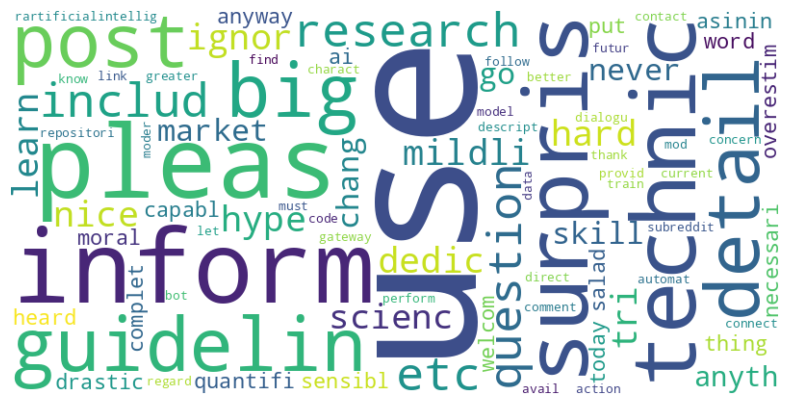

In [99]:
def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Apply preprocessing to each comment in the DataFrame
for i in range(df.shape[0]):
    preprocessed_comment = preprocess_text(df['Comments'][i])

# Generate a word cloud from the preprocessed comment
generate_word_cloud(preprocessed_comment)